In [327]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [328]:
train_df = pd.read_csv('../../data/houseprice_train.csv').drop(10)
test_df = pd.read_csv('../../data/houseprice_test.csv')

Есть транзакционный датасет. айди человека, айди продукта, сумма покупки и время покупки. История 4 года. Нужно сделать модель который прогнозирует на отток клиентов.

In [329]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [330]:
train_df = train_df.drop(['LotFrontage', 'Alley', 'FireplaceQu'
              ,'GarageType', 'GarageYrBlt', 'GarageFinish', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test_df = test_df.drop(['LotFrontage', 'Alley', 'FireplaceQu'
              ,'GarageType', 'GarageYrBlt', 'GarageFinish', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [331]:
train_df = train_df.dropna(axis=0, subset=['Electrical'])
test_df = test_df.dropna(axis=0, subset=['Electrical'])

In [332]:
train_df.shape

(1458, 65)

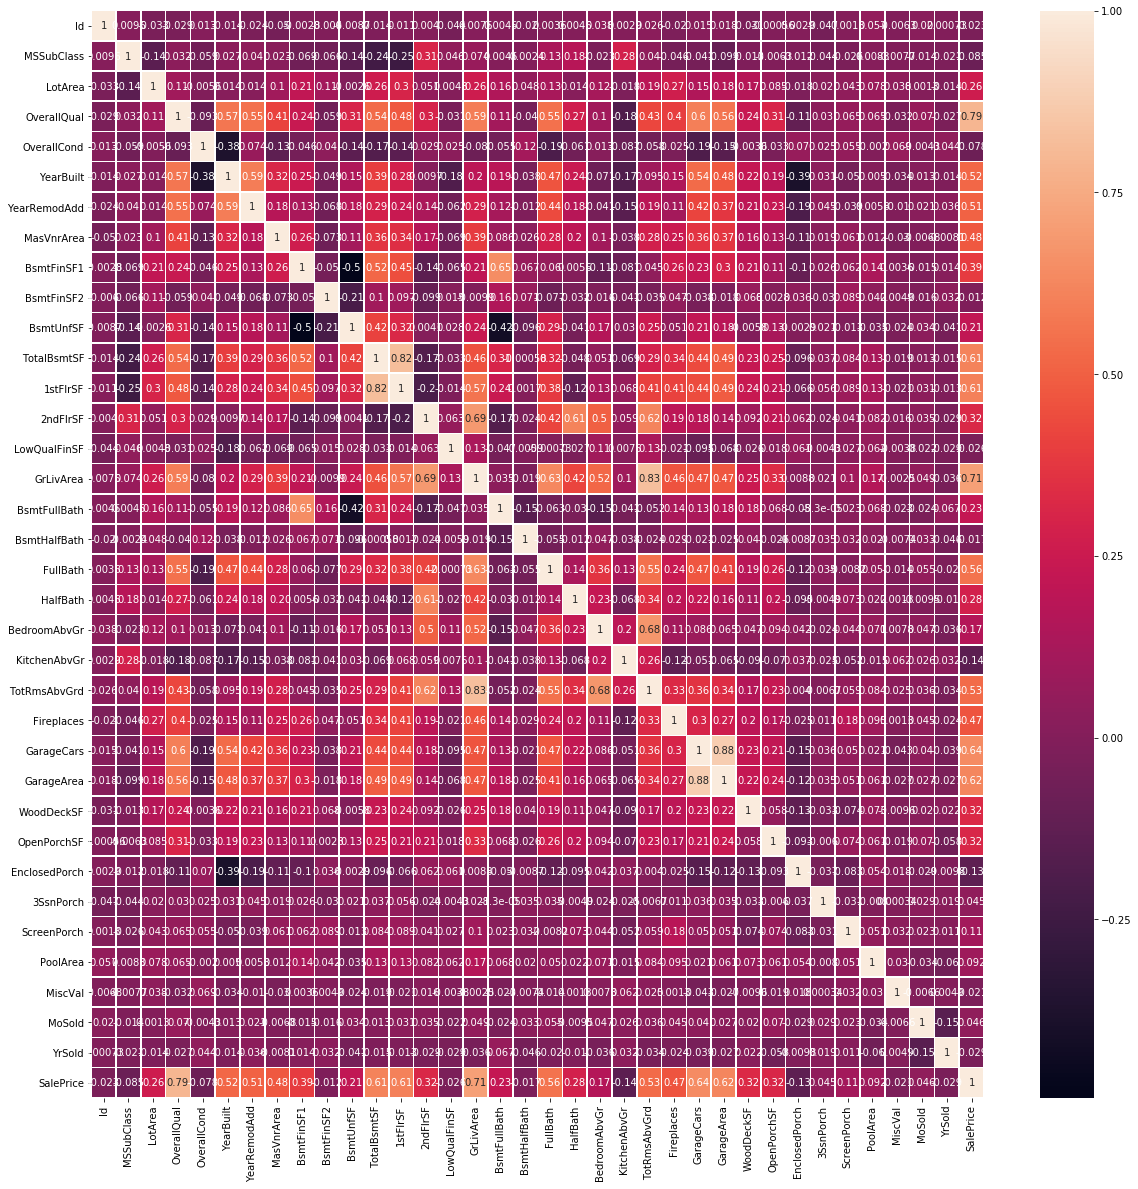

In [333]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(corr, xticklabels=True, yticklabels=True, annot=True, linewidths=.5, ax=ax);

In [334]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
                ..
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [335]:
y = train_df['SalePrice']
train_df.drop('SalePrice', axis=1).head(1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal


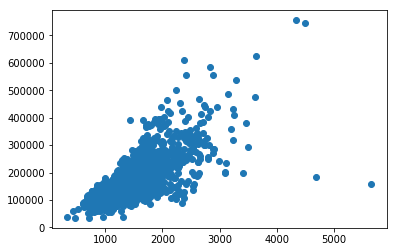

In [336]:
features = ['OverallQual', 'GrLivArea']
plt.scatter((train_df['OverallQual'] + train_df['GrLivArea']), y);

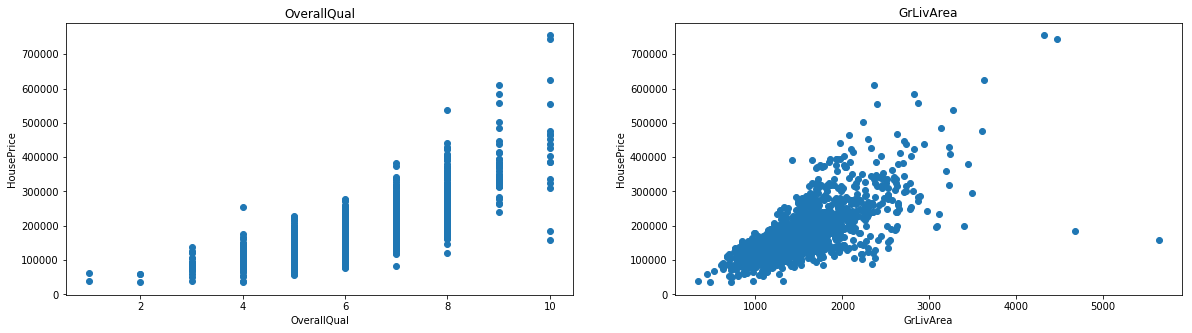

In [337]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x_plot = train_df[col]
    y_plot = y
    plt.scatter(x_plot, y_plot, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('HousePrice')

In [338]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [339]:
lr.fit(train_df[features], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [340]:
prediction = lr.predict(test_df[features])
test_df.shape

(1459, 64)

In [341]:
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 -104218.07531348825
Coefficients: 
 [32866.12203813    55.85780842]


In [342]:
import statsmodels.api as sm
model = sm.OLS(y, train_df[features])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:40:09   Log-Likelihood:                -17793.
No. Observations:                1458   AIC:                         3.559e+04
Df Residuals:                    1456   BIC:                         3.560e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual  1.761e+04    764.925     23.019      